## 1. Data Loading and Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/marketing.csv')

**Step 1:** Inspecting the marketing data to review what the data types are and the amount on entries are in the this set.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    200 non-null    float64
 1   facebook   200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.head()

,youtube,facebook,newspaper,sales
0,276.12,45.36,83.04,26.52
1,53.40,47.16,54.12,12.48
2,20.64,55.08,83.16,11.16
3,181.80,49.56,70.20,22.20
4,216.96,12.96,70.08,15.48


In [5]:
data.isnull().sum().sum() #No null entries

0

**Step 2:** Calculating basic statistics for each column

In [6]:
data[['youtube','facebook','newspaper','sales']].agg(['mean','std','min','max'])

,youtube,facebook,newspaper,sales
mean,176.451000,27.916800,36.664800,16.827000
std,103.025084,17.816171,26.134345,6.260948
min,0.840000,0.000000,0.360000,1.920000
max,355.680000,59.520000,136.800000,32.400000


**Step 3:** Plotting data to visualize potential relationships

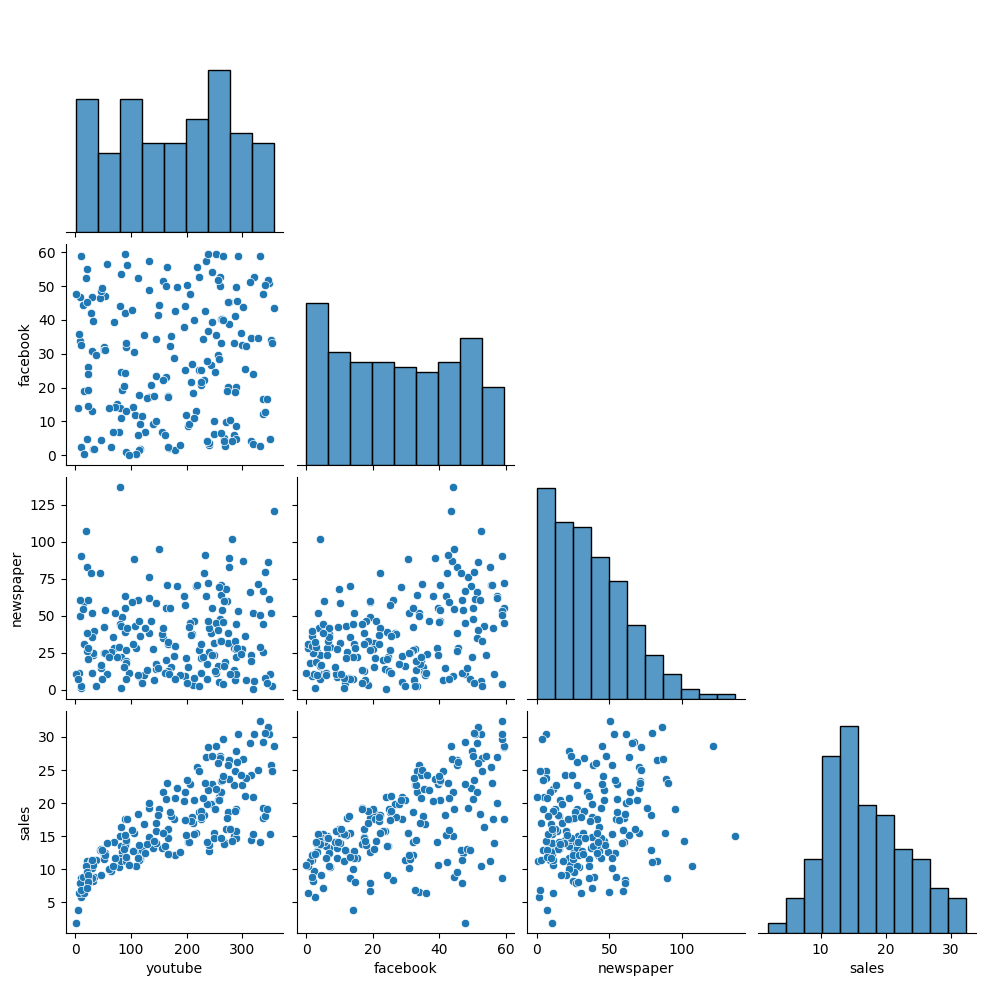

In [7]:
sns.pairplot(data, corner=True)

Looking at the relationships, we can assume there is some variation within each column compared with sales (y) and the other categories (x).

## 2. Multiple Linear Regression Model

**Step 1:** Setting target (y) and predictor (x) variables to begin building stats model

In [8]:
import statsmodels.api as sm

In [9]:
y = data['sales']
X = data[['youtube','facebook','newspaper']]

In [10]:
y.head()

,sales
0,26.52
1,12.48
2,11.16
3,22.20
4,15.48


In [11]:
X.head()

,youtube,facebook,newspaper
0,276.12,45.36,83.04
1,53.40,47.16,54.12
2,20.64,55.08,83.16
3,181.80,49.56,70.20
4,216.96,12.96,70.08


In [12]:
# Adding constant for Intercept

X = sm.add_constant(X)

**Step 2:** Splitting dataset into training and  testing sets. Data will be split by 70% (Training) and 30% (Testing)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
#Viewing shapes of training and testing sets

print(f'X shape = {X.shape}')
print(f'X test shape = {X_test.shape}')
print(f'X train shape = {X_train.shape}')

X shape = (200, 4)
X test shape = (60, 4)
X train shape = (140, 4)


**Step 3:** Building and Training the Multiple Linear Regression Model with StatsModel.

Using sm.OLS() from the StatsModels library helps minimize the sum of the squared differences between actual and predicitive values

In [15]:
model = sm.OLS(y_train, X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.88e-69
Time:                        23:41:07   Log-Likelihood:                -287.74
No. Observations:                 140   AIC:                             583.5
Df Residuals:                     136   BIC:                             595.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2507      0.448      7.250      0.0

**Step 4:** Making predictions on the testing data and evaluating model performance

In [16]:
# Define function to print the regression equation from the model coefficients
def print_regression_equation(model):
    intercept = model.params.iloc[0]

    # Get the coefficients for each predictor
    predictors = model.params.iloc[1:]
    equation = f"Sales = {intercept:.4f}"

    # Add each predictor with its coefficient to the equation
    for predictor, coef in predictors.items():
        equation += f" + ({coef:.4f} * {predictor})"

    return equation
print("Equation for Model")
print_regression_equation(model)

Equation for Model


'Sales = 3.2507 + (0.0441 * youtube) + (0.1993 * facebook) + (0.0069 * newspaper)'

In [17]:
#Prediciton on test set

y_pred = model.predict(X_test)

In [18]:
# Viewing test
X_test.head()

,const,youtube,facebook,newspaper
95,1.0,195.96,37.92,63.48
15,1.0,234.48,57.24,63.48
30,1.0,351.48,33.96,51.84
158,1.0,14.04,44.28,54.24
128,1.0,264.36,58.80,3.84


In [19]:
# Creating DF for results predicted, actual, and residual error

ads_df_results = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test,
    'Residuals': y_test - y_pred
})

ads_df_results.head()

,Predicted,Actual,Residuals
95,19.878476,20.28,0.401524
15,25.425873,26.88,1.454127
30,25.861285,25.68,-0.181285
158,13.067086,8.76,-4.307086
128,26.642784,29.64,2.997216


In [20]:
#Evaluating Model Performance

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: +- {mse:.2f}')
print(f'Root Mean Squared Error : +- {rmse:.2f}')
print(f'R-Squared: {r2:.2f}')

Mean Squared Error: +- 5.47
Root Mean Squared Error : +- 2.34
R-Squared: 0.86


## 3. Model Asusmption Check

**Assumption 1:** Linearity

Text(0.5, 1.0, 'Residuals vs. Predicted Values')

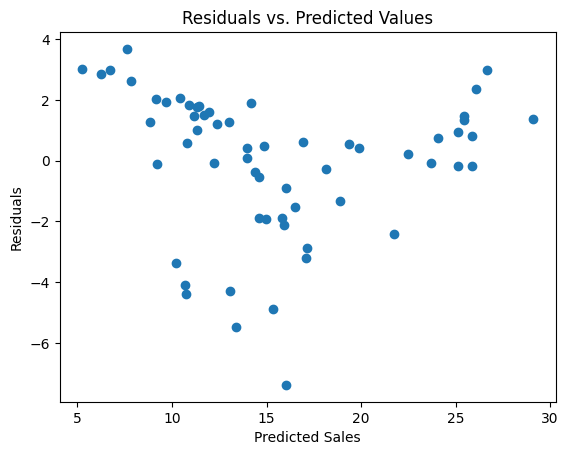

In [21]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')

Residuals are scattered randomly around zero.

Assumption met

**Assumption 2:** Normality of Residuals

Text(0.5, 1.0, 'Distribution of Residuals')

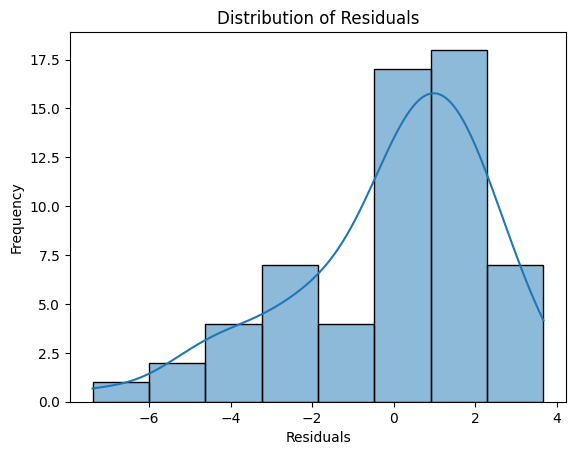

In [22]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

Bell-curved shape in histogram, indicating normality.

Assumption met

**Assumption 3:** Homoscedasticity

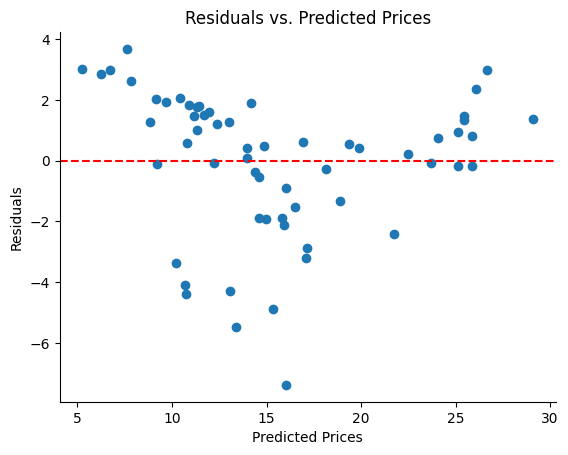

In [23]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Prices')
sns.despine()
plt.show()

Residuals scattered around zero. Model does not favor certain inputs and approximates data points well.

Assumption met.

**Assumption 4:** Multicollinearity

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#Viewing Variance Inflation Factor (VIF) values
print(vif_data)

     Feature       VIF
0      const  6.848900
1    youtube  1.004611
2   facebook  1.144952
3  newspaper  1.145187


Since VIF values are less than 10, then factors (youtube, facebook, newspaper) do not correlate with each other. Indicating that model is not unstable.

Assumption met

## 4. Model Interpretation

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.88e-69
Time:                        23:41:08   Log-Likelihood:                -287.74
No. Observations:                 140   AIC:                             583.5
Df Residuals:                     136   BIC:                             595.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2507      0.448      7.250      0.0

Each coefficient represents the change in the target variable (Sales) for a one-unit increase in that predictor variable, while holding the other predictors constant. Here’s what each coefficient means in this model (assuming ad prices and sales are in thousands of dollars):


Ex. 0.1 x 1000 = $100

- **Intercept (const): 3.25**
  - This is the predicted sales for advertising when all predictor values (youtube, facebook, newspaper) are zero. It serves as a baseline value for the model.

- **YouTube Coefficient: 0.0441**
  - For each additional YouTube ad, the model predicts an increase in Sales of $44.10 (assuming sales are in thousands of dollars).

  - This coefficient shows that YouTube ads have a positive effect on sales.

- **Facebook Coefficient: 0.1993**
  - For each additional Facebook ad, the model predicts an increase in Sales of $199.30.
  - This suggests that a Facebook ad significantly raises sales, holding other factors constant.

- **Newspaper Coefficient: 0.0069**
  - For each Newspaper ad , the price is predicted to increase by $6.90.
  - This indicates that having Newspaper ads has a positive impact on sales.

#### Summary

- **R-squared** tells us that 90.6% of the variation in Sales is explained by the model, which is high.
- **Coefficients** for YouTube, Facebook, and News Papers show the amount by which the price is expected to increase with each unit increase in these predictors, assuming other variables are held constant.

- We can also see that for every Facebook ad, it tends to have a greater impact on sales than YouTube and Newspaper ads combined

## 5. Analysis Questions

**Question 1: What does each coefficient tell you about the relationship between the advertising budget and sales?**

Each coefficient tells us that either youtube, facebook, or newspaper can negtively or postively impact sales (the dependent variable). If there is an increase of the independent variables, then there will be a change in the dependent variable assuming the other coefficients are held constant.



**Question 2: How well does this model explain the variation in sales?**

We know the R-Squared is 90.6%, which tells us that the model using youtube, facebook, and newspaper ads are able to explain 90.6% of the variation of the data. It is explaining the variation well.

**Question 3: Are there any advertising channels that do not contribute significantly to the model? If so, consider possible reasons why.**

While Newspaper ads are the lowest contribution to sales, only contributing $6.90 per ad, we can assume the reason for this is due to people not buying as much newpapers and everything is becoming digital.

We can also look at the P-value of Newpaper from the summary table. A P-value of 0.325 being greater than 0.05 tells us that newspaper ads are not significant in contributing to sales.

In [27]:
!jupyter nbconvert --to html /content/Marketing_Data_Analysis_Dylan_Gonzalez.ipynb

[NbConvertApp] WARNING | pattern '/content/Marketing_Data_Analysis_Dylan_Gonzalez.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--Jupyt